Wczytano plik: master_dataset_project.csv


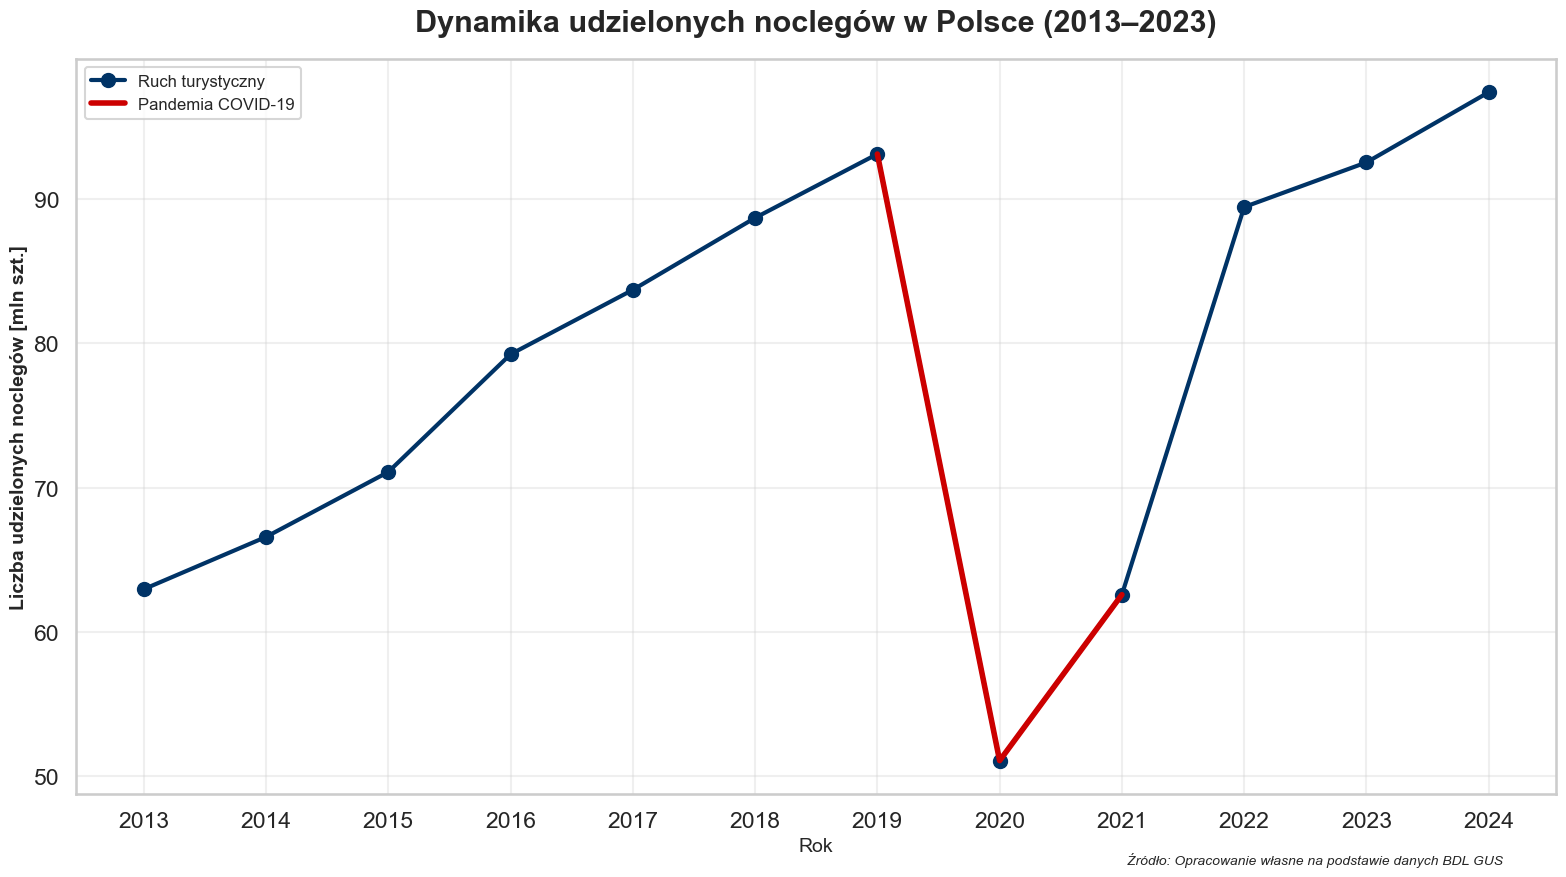

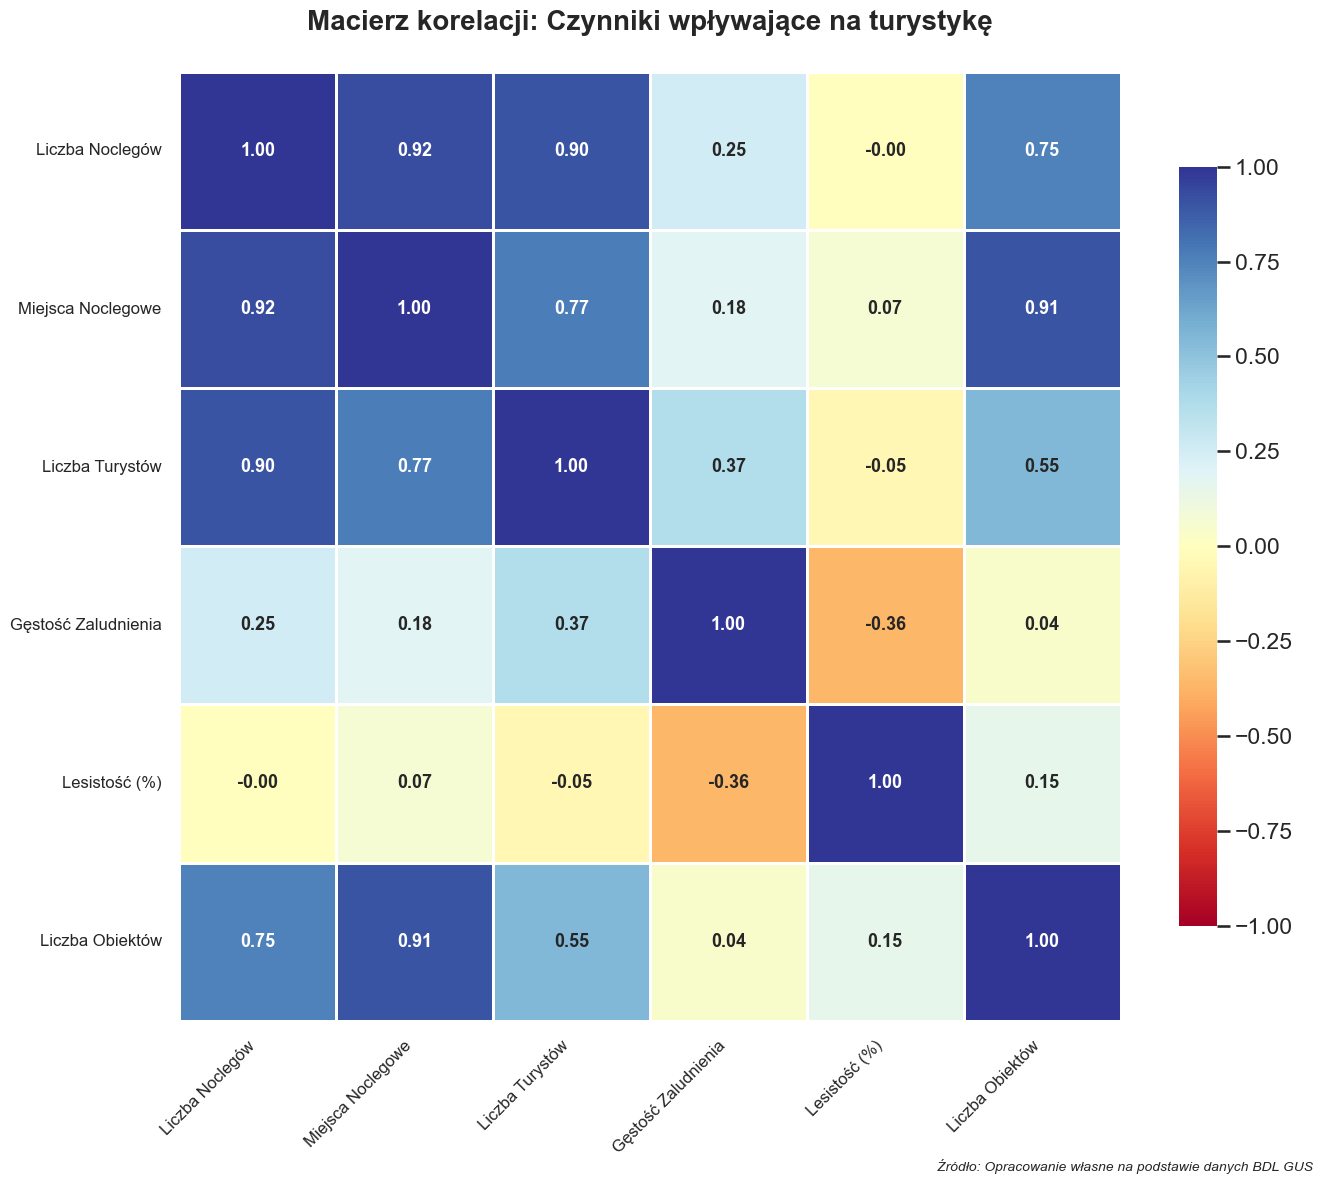

Gotowe. Wykresy zostały wygenerowane i zapisane.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import os

# --- USTAWIENIA STYLU (PROFESJONALNY WYGLĄD) ---
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['font.family'] = 'Arial'

# 1. WCZYTANIE DANYCH
file_name = "master_dataset_project.csv"

# Sprawdzamy czy plik jest w folderze roboczym, jeśli nie - szukamy w pełnej ścieżce
if os.path.exists(file_name):
    df = pd.read_csv(file_name)
    print(f"Wczytano plik: {file_name}")
else:
    # Opcja zapasowa (ścieżka, którą podawałeś wcześniej)
    path = r"C:\Nazar Haievskyj\Dane w\master_dataset_project.csv"
    if os.path.exists(path):
        df = pd.read_csv(path)
        print(f"Wczytano z pełnej ścieżki: {path}")
    else:
        print("BŁĄD: Nie znaleziono pliku!")
        raise FileNotFoundError("Brak pliku master_dataset_project.csv")

# Czyszczenie nazw kolumn (usuwanie spacji)
df.columns = df.columns.str.strip()

# Konwersja roku na liczbę całkowitą
df['Rok'] = pd.to_numeric(df['Rok'], errors='coerce')
df = df.dropna(subset=['Rok'])
df['Rok'] = df['Rok'].astype(int)

# =========================================================
# WYKRES 1: TREND CZASOWY (JEDNOSTKA: MLN SZTUK)
# =========================================================

# Agregacja danych (suma dla całej Polski)
trend_data = df.groupby('Rok')['Udzielone_Noclegi'].sum().reset_index()

# Przeliczenie na miliony dla czytelności wykresu
trend_data['Noclegi_mln'] = trend_data['Udzielone_Noclegi'] / 1_000_000

plt.figure(figsize=(16, 9))

# Rysowanie linii głównej
plt.plot(trend_data['Rok'], trend_data['Noclegi_mln'], 
         marker='o', markersize=10, color='#003366', linewidth=3, label='Ruch turystyczny')

# Wyróżnienie okresu COVID-19 (2019-2021)
covid_period = trend_data[(trend_data['Rok'] >= 2019) & (trend_data['Rok'] <= 2021)]
plt.plot(covid_period['Rok'], covid_period['Noclegi_mln'], 
         color='#cc0000', linewidth=4, label='Pandemia COVID-19')

# Formatowanie osi Y - proste liczby (np. 60, 70, 80)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

# Tytuły i opisy
plt.title("Dynamika udzielonych noclegów w Polsce (2013–2023)", fontsize=22, fontweight='bold', pad=20)
plt.xlabel("Rok", fontsize=14)
plt.ylabel("Liczba udzielonych noclegów [mln szt.]", fontsize=14, fontweight='bold') # Jasna jednostka
plt.xticks(trend_data['Rok'].unique()) # Każdy rok widoczny
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3)

# Źródło danych
plt.figtext(0.95, 0.02, "Źródło: Opracowanie własne na podstawie danych BDL GUS", ha="right", fontsize=10, style='italic')

plt.tight_layout()
plt.savefig("Wykres_Trend_mln.png", dpi=300) # Zapis do pliku
plt.show()

# =========================================================
# WYKRES 2: MACIERZ KORELACJI
# =========================================================

# Wybór kolumn (tylko te, które mają sens do analizy)
cols_to_check = [
    'Udzielone_Noclegi', 
    'Liczba_Miejsc', 
    'Liczba_Turystow', 
    'Gestosc_Zaludnienia', 
    'Lesistosc_Proc', 
    'Liczba_Obiektow'
]

# Sprawdzenie dostępności kolumn w pliku
available_cols = [c for c in cols_to_check if c in df.columns]

# Słownik do zmiany nazw na ładne polskie (bez "podłóg")
labels_dict = {
    'Udzielone_Noclegi': 'Liczba Noclegów',
    'Liczba_Miejsc': 'Miejsca Noclegowe',
    'Liczba_Turystow': 'Liczba Turystów',
    'Gestosc_Zaludnienia': 'Gęstość Zaludnienia',
    'Lesistosc_Proc': 'Lesistość (%)',
    'Liczba_Obiektow': 'Liczba Obiektów'
}

# Filtrowanie słownika
current_labels = {k: v for k, v in labels_dict.items() if k in available_cols}

if available_cols:
    # Obliczenie korelacji
    corr_matrix = df[available_cols].rename(columns=current_labels).corr()

    plt.figure(figsize=(14, 12))

    # Heatmapa (Mapa ciepła)
    sns.heatmap(corr_matrix, 
                annot=True,         # Pokaż wartości
                fmt=".2f",          # Dwa miejsca po przecinku
                cmap='RdYlBu',      # Profesjonalna skala kolorów (Czerwony-Niebieski)
                vmin=-1, vmax=1,    # Zakres od -1 do 1
                linewidths=1, linecolor='white',
                annot_kws={"size": 13, "weight": "bold"},
                cbar_kws={"shrink": 0.8}
               )

    plt.title("Macierz korelacji: Czynniki wpływające na turystykę", fontsize=20, fontweight='bold', pad=30)
    
    # Poprawa czytelności etykiet
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)

    # Źródło
    plt.figtext(0.95, 0.01, "Źródło: Opracowanie własne na podstawie danych BDL GUS", ha="right", fontsize=10, style='italic')

    plt.tight_layout()
    plt.savefig("Wykres_Korelacja_Final.png", dpi=300)
    plt.show()
else:
    print("Nie znaleziono odpowiednich kolumn do korelacji.")

print("Gotowe. Wykresy zostały wygenerowane i zapisane.")